## Review of Lecture 4

### In lecture 4, we learned 

* Functions
* Modules

## Lecture 5, Numpy and Matplotlib

In this lecture, we will take a first look at two very useful Python modules called **numpy** and **matplotlib**. Most of the data analysis in this class will be done nicely by using these two maodules (also the **pandas** module which will be introduced later). 

### A. Introduction to numpy


How do you pronounce the word "**numpy**"? - the standard should be "Num" as in "Number" and "Pie" as it is (or **Py**thon). You can also call it *Num-Pee*...  

Now remember how do we load a module in Python? the **import** command. Let's first try load **numpy** into you Python and use the square root function sqrt( ):

In [23]:
import numpy

# This import command makes all the functions in NumPy available to you for analyzing your data.
# Remember, you must call them with the numpy.FUNC() syntax unless you give it a nickname

print(numpy.pi)   # pi
print(numpy.sqrt(9)) # sqrt function

3.141592653589793
3.0


Remember from the last lecture, there are many different ways you can use the import command. Each way allows your program to access the functions and variables defined in the imported package, but differs in how you call the function after importing:

In [25]:
# Here is another way to import a module:  
import numpy as np  # or any other variable e.g.:  N
# This does the same as the first, but allows you to set NumPy as a variable

# In this case, you substitute "np" for numpy:

print(np.pi)
print(np.sqrt(9))  # or N.pi in the second case.

3.141592653589793
3.0


Or the most lazy way to import the **numpy** module by using the * (not recommanded):

In [3]:
from numpy import * # now all the functions are available directly, without the initial module name

print(pi)
print(sqrt(9.0))
print(sin(pi))

3.141592653589793
3.0
1.2246467991473532e-16


**TIP**: I would recommand you to import the numpy package using the **np** option above, which is very commonly used in other people's Python codes. That way you know clearly where the functions come from (they are from numpy). This is useful, becuase we don't use or know ALL of the functions available in any given package. A function defined in the package could conflict with one defined in your program. Similarly, two different packages or modules could have the same function or variable name.

### (Partial) List of NumPy functions

**1. Basic functions**:

|function | purpose|
|------------ |--------------|
| absolute(x)  | absolute value|
| degrees(x)   |Convert angles from radians to degrees |
| radians(x)    | Convert angles from degrees to radians |
| deg2rad(x)    | Convert angles from degrees to radians |
| rad2deg(x)  |Convert angles from radians to degrees| 


**2. Trigonometric functions**:

|function | purpose|
|------------ |--------------|
| arccos(x)   |arccosine |
| arcsin(x)    | arcsine |
| arctan(x)    | arctangent |
| arctan2(y,x)  |arctangent of y/x in correct quadrant| 
| cos(x)        |cosine |
| sin(x)       | sine |
| tan(x)      |  tangent |

**3. Exponents and Logarithms functions**:

|function | purpose|
|------------ |--------------|
| exp(x)   |Calculate the exponential of all elements in the input array |
| log(x)    | Natural logarithm, element-wise |
| log2(x)    | Base-2 logarithm of x |
| log10(x)        |Return the base 10 logarithm of the input array, element-wise |

**4. Rounding functions**:

|function | purpose|
|------------ |--------------|
| round(x)   |Round an array to the given number of decimals |
| floor(y,x)  |Return the floor of the input, element-wise | 
| ceil(x)        |Return the ceiling of the input, element-wise |
| trunc(x)      | Return the truncated value of the input, element-wise |



**5. Sums, products, differences**:

|function | purpose|
|------------ |--------------|
| sum(x)  | Sum of array elements over a given axis|
| prod(x)   |Return the product of array elements over a given axis |
| trunc(x)      | Return the truncated value of the input, element-wise |
| diff(x)  | Calculate the n-th discrete difference along given axis|
| gradient(x)   |Return the gradient of an N-dimensional array |
| cross(x,y)      | Return the cross product of two (arrays of) vectors |
| trapz(x,y)      | Integrate along the given axis using the composite trapezoidal rule |



**6. Miscellaneous**:

|function | purpose|
|------------ |--------------|
| sqrt(x)  | Return the positive square-root of an array, element-wise|
| square(x)   |Return the element-wise square of the input |
| fabs(x)      | Compute the absolute values element-wise |
| sign(x)  | Returns an element-wise indication of the sign of a number|
| max(x)   |Element-wise maximum of array elements |
| min(x)      | Element-wise minimum of array elements|




More information about basic math functions in numpy can be found here: https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html

### arrays in Python - please see the lecture notes

### Defining numpy arrays

Arrays are somewhat similar to lists 

**Recall**: Arrays are collection of data with different types, they are:  
* Powerful
* hold different data types
* change, append, remove, etc.
* Need for data analysis: mathematical operations over collections and speed  

For example, you have a list of weight and another list of height of your patients:



In [4]:
# here are the list of heights and weights
height = [1.73, 1.68, 1.71, 1.89, 1.79]
weight = [65.4, 59.2, 63.6, 88.4, 68.7]

# print the types of the two lists - of course they are lists..
type(height), type(weight)

(list, list)

Now what if I wand to calculate the body mass ratio (BMI) of my patients using the height and weight list using $BMI = \frac{weight}{height^2}$. If you try working with the list directly using mathematical operators */* and ****, you get an error message:

In [5]:
bmi = weight / height ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In this case, you need to write a **for**-loop or a **while**-loop to step through all the numbers in you list, such as:

In [1]:
# here are the list of heights and weights
height = [1.73, 1.68, 1.71, 1.89, 1.79]
weight = [65.4, 59.2, 63.6, 89.4, 68.7]

N = len(height) # len() function gives the length of the list, then assign to N
bmi = []        # define an empty list named "bmi" to store the values of each BMI
for i in range(N):
    bmi.append(weight[i]/height[i]**2) # calculate BMI for each element and append to the bmi list

print(bmi) # print the results

[21.85171572722109, 20.97505668934241, 21.750282138093777, 25.027294868564713, 21.44127836209856]


Or, we can use the zip( ) function to loop through two lists at the same time:

In [5]:
height = [1.73, 1.68, 1.71, 1.89, 1.79]
weight = [65.4, 59.2, 63.6, 89.4, 68.7]

bmi = [] # create an empty list for bmi
for (i,j) in zip(weight, height): # here i will iterate through the list "weight", 
                                  #  and j will interate through "height"
    bmi.append(i/j**2) # compute BMI
    
print(bmi) # print the results

[21.85171572722109, 20.97505668934241, 21.750282138093777, 25.027294868564713, 21.44127836209856]


The **for** loop does get the job done by stepping through each element in the lists, however, it's quite tedious and, actually, unnecessary. This is when **numpy** comes handy. In this case, you can define both *height* and *weight* as **numpy arrays**, and you can do the element-wise calculations directly using the operators:

In [19]:
import numpy as np  # or any other variable e.g.:  N

# first let's define two Python lists called height and weight
height = [1.73, 1.68, 1.71, 1.89, 1.79]
weight = [65.4, 59.2, 63.6, 99.4, 98.7]

print(type(weight), type(height))

# now let's make corresponding numpy arrays using the .array() method
np_height = np.array(height)
np_weight = np.array(weight)

print(type(np_weight), type(np_height))

bmi = np_weight/np_height**2

print(type(bmi))
print(bmi)

<class 'list'> <class 'list'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[21.85171573 20.97505669 21.75028214 27.82676857 30.80428201]


So the numpy arrays are better solutions to this kind of element-wise calculations for numerical lists:

* Numeric calculations in Python
* Numpy arrays are alternative to Python Lists
* Calculations over entire arrays
* Easy to use and very fast  

You can work with your numpy arrays using most of the operators we've learned in previous lectures, Python knows that it's a numpy array, it steps through all the elements in a numpy array. For example, if we want to know whether someone's BMI is greater or less than 25, simply do:

In [4]:
fat = bmi > 25 # relational operation see whose bmi is greater than 25
print(type(fat),fat)

<class 'numpy.ndarray'> [False False False  True  True]


here "fat" is another array that each element gives you True or False depending on whether the bmi is greater than 25, and if you do the following, it gives you the numbers of bmi which are greater than 25:

In [5]:
bmi[fat] # slice to the value with BMI > 25

array([27.82676857, 30.80428201])

### More operations using NumPy arrays  

Note that, to specify a condition, you can also make use of the logical operators or and and. For example you want to see if there's anyone whose weight is greater than 65 and height is less than 1.75, you can simply use the relational operator ">" and "<" we've learned before, and combine them with the logical operator "&" (and): (the "or" operator is "|")

In [62]:
heavy_and_short = (np_weight > 65.0) & (np_height < 1.75) # find if someone is both heavier than 65kg and shorter than 1.75m
print(heavy_and_short)

[ True False False False False]


Now the array heavy_and_short consists of a series of booleans which tells you whether someone satifies both of your criteria. To access the weight and height of that person, you can use the array heavy_and_short as your numpy array index:

In [63]:
print( np_weight[heavy_and_short] ) # print the weight of the persion who's both heavy and short
print( np_height[heavy_and_short] ) # print the weight of the persion who's both heavy and short

[65.4]
[1.73]


You can also use numpy *methods* to do simple statistics on numpy arrays, let's try the min, max, mean, sum and standard deviation functions

In [73]:
print (np_weight.min())  # print the minimum value      in the np_weight list
print (np_weight.max())  # print the maximim value      in the np_weight list
print (np_weight.mean()) # print the average value      in the np_weight list
print (np_weight.sum())  # print the sum of the weights in the np_weight list
print (np_weight.std())  # print the standard deviation in the np_weight list

59.2
99.4
77.26
386.3
17.906825514311574


65.4

However the **median** *function* works in a slightly different way (but very simple):

In [74]:
print (np.median(np_weight))  # print the median value in the np_weight list

65.4


In [15]:
np.sort(bmi)


array([20.97505669, 21.75028214, 21.85171573, 27.82676857, 30.80428201])

Beside mathematical and logical operations, you can also append, insert and delete elements in a numpy array:

In [83]:
new_weight = np.append(np_weight,[78.1, 63.9, 108.2]) # append another three weight to the np_weight array 
print(new_weight) # print the results

new_weight = np.insert(new_weight,1,77.7) # insert 77.7 at index 1 (the second element is changed)
print(new_weight) # print the results

new_weight = np.delete(new_weight,[0]) # delete the first element
print(new_weight) # print the results

[ 65.4  59.2  63.6  99.4  98.7  78.1  63.9 108.2]
[ 65.4  77.7  59.2  63.6  99.4  98.7  78.1  63.9 108.2]
[ 77.7  59.2  63.6  99.4  98.7  78.1  63.9 108.2]


### More ways to creat NumPy arrays   

What people often mean when they say that they are creating “empty” arrays is that they want to make use of initial placeholders, which you can fill up afterwards. You can initialize arrays with ones or zeros, but you can also make arrays that get filled up with evenly spaced values, constant or random values. Here are more ways to creat 1-D numpy arrays using the following functions (we will talk about 2-D arrays in the next lectures)



In [19]:
# Create an array of ones
print( np.ones((4)) )

# Create an array of zeros
print( np.zeros((5),dtype=np.int16) )

# Create an array with random values
print( np.random.random((6)) )

# Create an empty array
print( np.empty((7)) )

# Create a full array
print( np.full(8,7) )

# Create an array of evenly-spaced values
print( np.arange(10,25,1) )

# Create an array of evenly-spaced values
print( np.linspace(0,2,9) )

[1. 1. 1. 1.]
[0 0 0 0 0]
[0.26298286 0.97498731 0.78752137 0.88933936 0.41598039 0.76355419]
[0. 0. 0. 0. 0. 0. 0.]
[7 7 7 7 7 7 7 7]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


### Index slicing in 1-D Numpy arrays

Similar to lists (also string variables), you can access a specific subset of a 1-D numpy array using the index method we've learned before, using square brackets [ ] as the index operator. For example:

In [47]:
# define an numpy array called num, all integers, starts from 11, stops at 24
num =  np.arange(11,25,1) # or if you do np.linspace(11,25,15)
print(num)

# access the second number in the array "num"
print( num[1] )

# access the last number:
print( num[-1] )

# access a subset of numbers from the 3rd to 10th
print( num[2:10] )

# access a subset of numbers from the 3rd all to 10th, but every other one
print( num[2:10:2] )

# access a subset of numbers from the 3rd all the way to the end
print( num[2:] )

[11 12 13 14 15 16 17 18 19 20 21 22 23 24]
12
24
[13 14 15 16 17 18 19 20]
[13 15 17 19]
[13 14 15 16 17 18 19 20 21 22 23 24]


### Using NumPy Functions

As already mentioned, **NumPy** has many math functions.   We will use a few to generate some data sets that we can then plot using **matplotlib**, a different Python module. 

First, let's make a list of angles ($\theta$ or **theta**) around a circle.  We begin with the list of angles in degrees, convert them to radians (using **np.radians( )**), then use the **np.sin( )** to construct a list of sines of those angles we just defined:  

In [26]:
theta_in_degrees=np.arange(0,360,2) # list of angles from 0 to 359 at two degree intervals

theta_in_radians=np.deg2rad(theta_in_degrees) # convert to radians
sine_theta=np.sin(theta_in_radians) # calculate the sine values for all the thetas
sine_theta #output sine_thetas_in_degrees

array([ 0.00000000e+00,  3.48994967e-02,  6.97564737e-02,  1.04528463e-01,
        1.39173101e-01,  1.73648178e-01,  2.07911691e-01,  2.41921896e-01,
        2.75637356e-01,  3.09016994e-01,  3.42020143e-01,  3.74606593e-01,
        4.06736643e-01,  4.38371147e-01,  4.69471563e-01,  5.00000000e-01,
        5.29919264e-01,  5.59192903e-01,  5.87785252e-01,  6.15661475e-01,
        6.42787610e-01,  6.69130606e-01,  6.94658370e-01,  7.19339800e-01,
        7.43144825e-01,  7.66044443e-01,  7.88010754e-01,  8.09016994e-01,
        8.29037573e-01,  8.48048096e-01,  8.66025404e-01,  8.82947593e-01,
        8.98794046e-01,  9.13545458e-01,  9.27183855e-01,  9.39692621e-01,
        9.51056516e-01,  9.61261696e-01,  9.70295726e-01,  9.78147601e-01,
        9.84807753e-01,  9.90268069e-01,  9.94521895e-01,  9.97564050e-01,
        9.99390827e-01,  1.00000000e+00,  9.99390827e-01,  9.97564050e-01,
        9.94521895e-01,  9.90268069e-01,  9.84807753e-01,  9.78147601e-01,
        9.70295726e-01,  

In [38]:
print(np.ndim(theta_in_degrees)) # the ndim() function gives you the dimension of your array

print(np.size(theta_in_degrees)) # the size() function gives you how many elements in total

print(np.shape(theta_in_degrees)) # the shape() function gives you the length of the array in each dimension

1
180
(180,)


### Plotting data - Introduction to matplotlib

Now that we've generated some data, we would like to look at it. Yes we can just print out the values, but it is way more interesting to make a plot.   The easiest way to do this is using the package **matplotlib** which has many plotting functions, among them a whole module called **pyplot**. We **import** the **matplotlib.pyplot** module as **plt**. 

We've also included one more line that tells **pyplot** to plot the image within the notebook:  **%matplotlib inline**.  Note that this does not work in other environments, like command line scripts (which we will learn about later). 

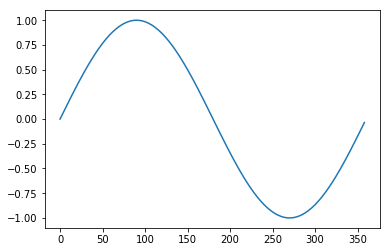

In [91]:
import matplotlib.pyplot as plt

plt.plot(thetas_in_degrees,sines); # plot the sines with the angles
plt.show() # if you don't have this .show() function, Python will not bother showing the plot!

Now you have generated your first Python plot! Let's try more function plots, it's fun! (looks like real work - well it is...). For example, let's try $\sin^{2.5}\theta$

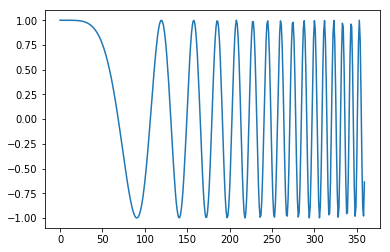

In [107]:
import numpy as np # import the numpy module ad name it as np
import matplotlib.pyplot as plt # import the pyplot sub-module from the matplotlib module

theta = np.arange(0,360,1) # here we used two numpy functions within one line of code: arange() and deg2rad()
plt.plot(theta,np.cos(np.deg2rad(theta)**2.5))       # use the plot function from plt to make the 1-D line plot
plt.show()                             # show results, make sure you type this everything when a plot is done

use the theta variable defined above, let's try plotting $\tan\theta$ using the np.tan() function:

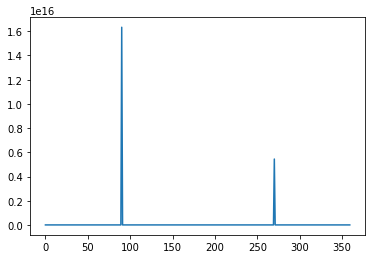

In [112]:
plt.plot(theta,np.tan(np.deg2rad(theta))) 

plt.show()

Hmmm, this doesn't look like $\tan\theta$ at all! what happened? The plot( ) function is doing what it is told to do, it gave you a plot of $\tan\theta$ within 0 and 360 degrees. Recall that the $\tan$ function has singularities when $\theta$ is a multiply of $\frac{\pi}{2}$, e.g., $\tan(\frac{\pi}{2}) = \inf$. Because there's no real **inf** in the computer, so Python gave you a huge number (1.6e16) and the plot looked very funny. This is when lable and axis control are needed to make sure your visualization makes sense to people. Let's try this function for your plot

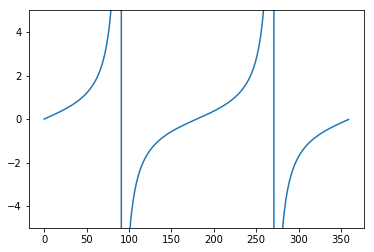

In [114]:
plt.plot(theta,np.tan(np.deg2rad(theta))) 

plt.ylim([-5,5]) # set the y limits from -5 to 5
plt.show()

Now you've got a more familiar $\tan\theta$ function!

### Features and styling in matplotlib
Every plot should include a title, axis, labels, bounds, etc. We can use Matplotlib to add these features and more - You are expected to do all these things to make your plot more readable throughout this course. Let's try this:

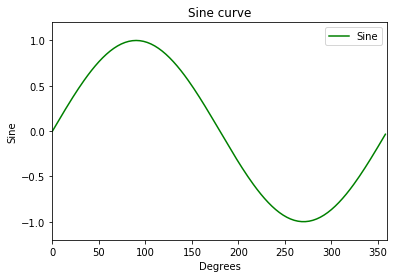

In [116]:
# I want to plot the sine curve as a green line, so I use 'g-' to do that:
plt.plot(thetas_in_degrees,sines,'g-',label='Sine') 
# the "label" argument saves this line for annotation in a legend
# let's add X and Y labels
plt.xlabel('Degrees') # make and X label
plt.ylabel('Sine') # label the Y axis
# and now change the x axis limits: 
plt.xlim([0,360]) # set the limits
plt.ylim([-1.2,1.2]) # set the limits
plt.title('Sine curve') # set the title
plt.legend(); # put on a legend!  